In [1]:
import openmc.data
import matplotlib.pyplot as plt

In [2]:
pu239 = openmc.data.IncidentNeutron.from_ace('/opt/data/ace/ENDF-B-VII.1-neutron-293.6K/Pu_239_293.6K.ace')

In [3]:
pu239

<IncidentNeutron: Pu239>

In [4]:
pu239.atomic_weight_ratio

236.9986

In [6]:
ngamma = pu239.reactions[102]

In [7]:
ngamma

<Reaction: MT=102 (n,gamma)>

In [9]:
xs = ngamma.xs['294K']

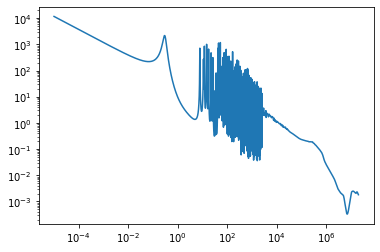

In [10]:
plt.loglog(xs.x, xs.y)

In [12]:
photon = ngamma.products[0]

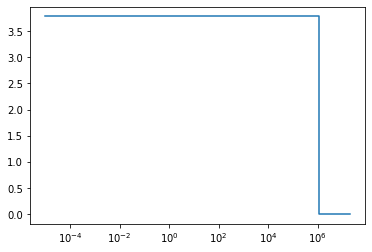

In [15]:
plt.semilogx(photon.yield_.x, photon.yield_.y)

In [16]:
pu239.export_to_hdf5('Pu239.h5')

In [17]:
!ls

'Consultancy meeting demonstration.ipynb'   Pu239.h5


In [19]:
xs.y *= 2

In [20]:
pu239.export_to_hdf5('Pu239_new.h5')

In [21]:
pu239_endf = openmc.data.IncidentNeutron.from_endf('/opt/data/endf/endf-b-viii.0/neutrons/n-094_Pu_239.endf')

In [22]:
pu239_endf.export_to_hdf5('Pu239_endf.h5')

NotImplementedError: Cannot export incident neutron data that originated from an ENDF file.

In [26]:
pu239_endf.resonances.unresolved.parameters

L    J        E       d  amux  amun  amuf   gx       gn0       gg     gf
0    0  0.0   2500.0  8.9172   0.0   1.0   2.0  0.0  0.000951  0.04070  2.842
1    0  0.0   2550.0  8.9155   0.0   1.0   2.0  0.0  0.000867  0.04070  0.402
2    0  0.0   2650.0  8.9139   0.0   1.0   2.0  0.0  0.001113  0.04070  2.841
3    0  0.0   2750.0  8.9122   0.0   1.0   2.0  0.0  0.000895  0.04070  2.840
4    0  0.0   2850.0  8.9105   0.0   1.0   2.0  0.0  0.000931  0.04070  2.840
..  ..  ...      ...     ...   ...   ...   ...  ...       ...      ...    ...
350  1  2.0  26500.0  1.8308   0.0   1.0   2.0  0.0  0.000305  0.03335  0.583
351  1  2.0  27500.0  1.8274   0.0   1.0   2.0  0.0  0.000305  0.03335  0.582
352  1  2.0  28500.0  1.8239   0.0   1.0   2.0  0.0  0.000304  0.03335  0.580
353  1  2.0  29500.0  1.8205   0.0   1.0   2.0  0.0  0.000304  0.03335  0.579
354  1  2.0  30000.0  1.8187   0.0   1.0   2.0  0.0  0.000303  0.03335  0.577

[355 rows x 11 columns]

In [27]:
pu239_endf = openmc.data.IncidentNeutron.from_njoy('/opt/data/endf/endf-b-viii.0/neutrons/n-094_Pu_239.endf', stdout=True)


 njoy 2016.60  05Aug20                                       03/16/21 10:18:58
 *****************************************************************************

 reconr...                                                                0.0s

 ---message from rdf2bw---calculation of angular distribution not installed.


KeyboardInterrupt: 

In [31]:
h3 = openmc.data.IncidentNeutron.from_njoy('/opt/data/endf/endf-b-viii.0/neutrons/n-001_H_003.endf', temperatures=(300., 600., 900.), stdout=True)


 njoy 2016.60  05Aug20                                       03/16/21 10:20:17
 *****************************************************************************

 reconr...                                                                0.0s

 broadr...                                                                0.0s
      300.0 deg                                                           0.0s
      600.0 deg                                                           0.1s
      900.0 deg                                                           0.1s

 heatr...                                                                 0.1s

 heatr...                                                                 0.2s

 gaspr...                                                                 0.3s

 purr...                                                                  0.3s

 mat =  131                                                               0.3s

 ---message from purr---mat  131 has no res

In [32]:
h3[2].xs

{'300K': <openmc.data.function.Tabulated1D at 0x149951e50c70>,
 '600K': <openmc.data.function.Tabulated1D at 0x149951dd35e0>,
 '900K': <openmc.data.function.Tabulated1D at 0x149951e3bfa0>,
 '0K': <openmc.data.function.Tabulated1D at 0x149951dd3460>}

In [33]:
h3.export_to_hdf5('tritium_multitemp.h5')